# Segmentación de Clientes basada en datos o en evidencia.
la segmentación de la base de clientes puede ayudar a los especialistas en marketing a comprender mejor a sus clientes y desarrollar estrategias de marketing más eficientes.
En marketing, a menudo tratamos de comprender el comportamiento de ciertos subgrupos de la base de clientes. Especialmente en el marketing dirigido, los especialistas en marketing intentan segmentar la base de clientes de determinadas formas y centrarse en cada segmento o grupo de clientes objetivo. Esta concentración en ciertos segmentos de clientes objetivo da como resultado un mejor desempeño, ya que las necesidades e intereses de esos clientes en el grupo objetivo se alinean y coinciden mejor con los productos, servicios o contenido de la empresa.

La importancia y los beneficios de tener una buena comprensión de los diferentes segmentos de la base de clientes y cómo utilizar los resultados del análisis de segmentos de clientes para diferentes estrategias de marketing. Además de una forma más tradicional de segmentar la base de clientes, que implica observar las estadísticas clave de ciertos atributos de los clientes y cortar manualmente la base de clientes en segmentos, también podemos utilizar el aprendizaje automático para que las máquinas encuentren las mejores formas de dividir al cliente. base en el número deseado de segmentos. En este capítulo, aprenderemos cómo podemos usar el algoritmo de agrupamiento en clústeres de k-medias para construir segmentos de clientes basados ​​en los datos históricos.

* Segmentación de clientes
* Algoritmos de agrupamiento
* Segmentar clientes con Python

Este es un método de aprendizaje no supervisado que aprende los puntos en común entre los grupos a partir de los datos. A diferencia del aprendizaje supervisado, donde hay un objetivo y una variable etiquetada que le gustaría predecir, el aprendizaje no supervisado aprende de los datos sin ningún objetivo o variable etiquetada. Entre muchos otros algoritmos de agrupamiento, vamos a explorar el uso del algoritmo de agrupamiento de k-mean.

Para agrupar registros similares, el algoritmo de agrupamiento de k-medias intenta encontrar los centroides, que son los centros o medios de los grupos , para minimizar las distancias entre los puntos de datos y los centroides dentro de los grupos.

Una desventaja o dificultad de usar la agrupación en clústeres de k-medias para la segmentación de clientes es el hecho de que necesita conocer la cantidad de clústeres de antemano. Sin embargo, con bastante frecuencia, no sabe cuál es el número óptimo de clústeres para crear. El coeficiente de silueta se puede utilizar para evaluar y ayudarlo a tomar decisiones sobre cuál será el mejor número de clústeres para su problema de segmentación. En pocas palabras, el coeficiente de silueta mide qué tan cerca están los puntos de datos de sus grupos en comparación con otros grupos .



In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

UTILIZAR ESTA PARTE SI ESTAS EN GOOGLE COLAB

In [ ]:
import sys
assert sys.version_info >= (3, 5)
import os

In [ ]:
RETAIL_PATH = "https://github.com/hcgalvan/UNSAM-Machine-Learning-on-Economics/raw/main/data/"

In [ ]:
if 'google.colab' in sys.modules:
  def load_datasets_h1(datasets_path=RETAIL_PATH):
    xlsx_path = os.path.join(datasets_path, "online_retail_II.xlsx")
    return pd.read_excel(xlsx_path)

  # The function loads the data as a Pandas DataFrame instance.
  retail_ol_h1 = load_datasets_h1()
  def load_datasets_h2(datasets_path=RETAIL_PATH):
      xlsx_path = os.path.join(datasets_path, "online_retail_II.xlsx")
      return pd.read_excel(xlsx_path,1)

  # The function loads the data as a Pandas DataFrame instance.
  retail_ol_h2 = load_datasets_h2()

# 1. Load Data

UTILIZAR ESTE PARTE DEL CODIGO SOLO SI DESCARGASTE EN PC

In [3]:
retail_ol_h1= pd.read_excel(io='./data/online_retail_II.xlsx', sheet_name='Year 2010-2011')
retail_ol_h2= pd.read_excel(io='./data/online_retail_II.xlsx', sheet_name='Year 2009-2010')

LO QUE SIGUE ES PARTE COMUN.
Para trabajar en googlecolab como para los que hemos descargado en PC.

In [4]:
frames = [retail_ol_h1, retail_ol_h2]
results = pd.concat(frames)
df = results.copy()

In [5]:
df.shape

(1067371, 8)

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Data Clean-Up

1. Eliminación de pedidos cancelados.
2. Eliminando registros sin Customer ID.
3. Excluimos meses incompletos.
4. Calcular las ventas totales de las columnas Cantidad y Precio unitario.
5. Datos por cliente : para analizar segmentos de clientes, necesitamos transformar nuestros datos, de modo que cada registro represente el historial de compras de clientes individuales.


#### - Cantidades Negativas

Manejo de cantidad negativa : Existen transacciones con Quantityvalor negativo , que representan pedidos cancelados. Vamos a ignorar esos pedidos cancelados para este ejercicio, por lo que tendremos que excluirlos de nuestro pandas DataFrame. El código para excluir estos valores negativos en la Quantity columna tiene el siguiente aspecto:

In [7]:
df.loc[df['Quantity'] <= 0].shape

(22950, 8)

In [8]:
df.shape

(1067371, 8)

In [9]:
df = df.loc[df['Quantity'] > 0]

In [10]:
df.shape

(1044421, 8)

#### - Registros sin Customer ID

Dejar caer  NaN  registros :  Tenemos que dejar sin registros CustomerID. Dado que vamos a crear un modelo de aprendizaje automático para predecir el valor del cliente de 3 meses, necesitamos agrupar los datos por CustomerID

In [12]:
pd.isnull(df['Customer ID']).sum()

238801

In [11]:
df.shape

(531285, 8)

In [13]:
df = df[pd.notnull(df['Customer ID'])]

In [14]:
df.shape

(805620, 8)

In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### - Excluyendo meses incompletos

In [16]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2009-12-01 07:45:00 ~ 2011-12-09 12:50:00


In [17]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17305, 8)

In [18]:
df.shape

(805620, 8)

In [19]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [20]:
df.shape

(788315, 8)

#### - Total de ventas

In [22]:
df.head

<bound method NDFrame.head of        Invoice StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0   

In [23]:
df['Sales'] = df['Quantity'] * df['Price']

In [24]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### - Datos por cliente

In [25]:
customer_df = df.groupby('Customer ID').agg({
    'Sales': sum,
    'Invoice': lambda x: x.nunique()
})

customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']

In [26]:
customer_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
Customer ID,,,
12346.0,77556.46,12,6463.038333
12347.0,5408.50,7,772.642857
12348.0,2019.40,5,403.880000
12349.0,4428.69,4,1107.172500
12350.0,334.40,1,334.400000
12351.0,300.93,1,300.930000
12352.0,2849.84,10,284.984000
12353.0,406.76,2,203.380000
12354.0,1079.40,1,1079.400000


In [27]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,5853.000000,5853.000000,5853.000000
mean,2942.972559,6.184350,377.123733
std,14338.715259,12.784213,526.012549
min,0.000000,1.000000,0.000000
25%,343.450000,1.000000,181.495000
50%,875.970000,3.000000,285.334286
75%,2263.300000,7.000000,422.700000
max,597336.110000,389.000000,14844.766667


In [28]:
rank_df = customer_df.rank(method='first')

In [29]:
rank_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
Customer ID,,,
12346.0,5836.0,5127.0,5846.0
12347.0,5257.0,4367.0,5455.0
12348.0,4240.0,3736.0,4244.0
12349.0,5103.0,3245.0,5678.0
12350.0,1425.0,1.0,3577.0
12351.0,1227.0,2.0,3094.0
12352.0,4653.0,4899.0,2919.0
12353.0,1743.0,1654.0,1800.0
12354.0,3292.0,3.0,5662.0


In [30]:
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,5853.000000,5853.000000,5853.000000
mean,2927.000000,2927.000000,2927.000000
std,1689.759894,1689.759894,1689.759894
min,1.000000,1.000000,1.000000
25%,1464.000000,1464.000000,1464.000000
50%,2927.000000,2927.000000,2927.000000
75%,4390.000000,4390.000000,4390.000000
max,5853.000000,5853.000000,5853.000000


In [31]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

In [32]:
normalized_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
Customer ID,,,
12346.0,1.721546,1.301960,1.727464
12347.0,1.378894,0.852192,1.496071
12348.0,0.777033,0.478766,0.779401
12349.0,1.287757,0.188192,1.628042
12350.0,-0.888884,-1.731607,0.384670
12351.0,-1.006060,-1.731015,0.098831
12352.0,1.021447,1.167030,-0.004734
12353.0,-0.700691,-0.753361,-0.666959
12354.0,0.216007,-1.730423,1.618573


In [33]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,5.853000e+03,5853.000000,5.853000e+03
mean,-4.855922e-18,0.000000,-9.711843e-18
std,1.000000e+00,1.000000,1.000000e+00
min,-1.731607e+00,-1.731607,-1.731607e+00
25%,-8.658035e-01,-0.865803,-8.658035e-01
50%,0.000000e+00,0.000000,0.000000e+00
75%,8.658035e-01,0.865803,8.658035e-01
max,1.731607e+00,1.731607,1.731607e+00


# 3. Segmentación de Clientes via K-Means Clustering

In [34]:
from sklearn.cluster import KMeans

#### - K-Means Clustering

In [35]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [36]:
kmeans

KMeans(n_clusters=4)

In [37]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 0])

Lo primero que veremos son los centros de cada grupo. Puede obtener los centros de clústeres utilizando el siguiente código:

In [38]:
kmeans.cluster_centers_

array([[ 1.22172349,  1.03139568,  0.91242439],
       [-0.21980602, -0.80095705,  0.78511479],
       [-1.22338064, -0.87123182, -1.06617174],
       [ 0.28054421,  0.68533414, -0.59470276]])

El tercer  grupo tiene los números más bajos para los tres atributos. Esto sugiere que el tercer  grupo contiene clientes con la menor cantidad de ventas, menor número de pedidos y menor valor promedio por pedido. Este grupo de clientes es uno de los clientes de bajo valor. Por otro lado, el primer  grupo tiene los números más altos para los tres atributos. Los clientes del primer  grupo tienen la mayor cantidad de ventas, la mayor cantidad de pedidos y el valor promedio por pedido más alto. Entonces, estos clientes en el primer  grupo compra artículos caros y proporcione a la empresa los mayores ingresos. Por lo general, querrá centrar sus esfuerzos de marketing en este segmento de clientes, ya que dará como resultado el mayor rendimiento.

Los clientes del segundo  grupo son interesantes. Realizan compras con relativa frecuencia, ya que tienen un valor de centro de grupo de medio a alto , pero su valor promedio por pedido es bajo, ya que el centro de grupo de es bajo. Estos son los clientes que realizan compras frecuentes de artículos de bajo valor. Por lo tanto, sería perfecto comercializar artículos con precios bajos por artículo para este segmento de clientes. Los clientes del primer  grupo también son interesantes. Sus contribuciones a los ingresos y al número de pedidos son de medianas a bajas, observando los centros de este clúster. OrderCount AvgOrderValue. Sin embargo, su valor promedio por pedido es alto. Estos son los clientes que compran artículos caros con poca frecuencia. Por lo tanto, sería perfecto comercializar artículos costosos para este segmento de clientes.

Como puede ver en este ejemplo, observar los centros de los clústeres nos ayuda a comprender los diferentes tipos y segmentos de clientes y cómo orientarlos de manera diferente. Por último, también podemos conocer cuáles son los artículos más vendidos para cada segmento de clientes.

Como se puede ver en el código, estamos ajustando un modelo k-means clustering con 4 racimos, basado en tres atributos:  TotalSales, OrderCount, y AvgOrderValue. A continuación, almacenamos la información de la etiqueta de clúster en una trama de datos, four_cluster_df.

In [39]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [40]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
Customer ID,,,,
12346.0,1.721546,1.301960,1.727464,0
12347.0,1.378894,0.852192,1.496071,0
12348.0,0.777033,0.478766,0.779401,0
12349.0,1.287757,0.188192,1.628042,0
12350.0,-0.888884,-1.731607,0.384670,1


In [41]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1518
1    1404
2    1576
3    1355
Name: TotalSales, dtype: int64

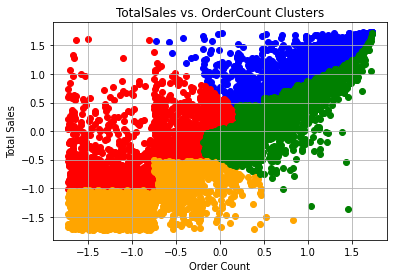

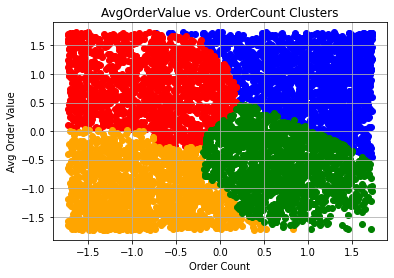

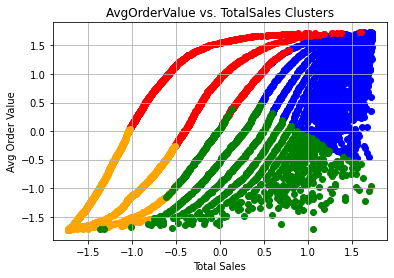

In [42]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

#### - Selecting the best number of clusters

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4176
Silhouette Score for 5 Clusters: 0.3811
Silhouette Score for 6 Clusters: 0.3876
Silhouette Score for 7 Clusters: 0.3706
Silhouette Score for 8 Clusters: 0.3778


#### - Interpreting Customer Segments

In [45]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

In [46]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [47]:
four_cluster_df.head(15)

,TotalSales,OrderCount,AvgOrderValue,Cluster
Customer ID,,,,
12346.0,1.721546,1.301960,1.727464,3
12347.0,1.378894,0.852192,1.496071,3
12348.0,0.777033,0.478766,0.779401,3
12349.0,1.287757,0.188192,1.628042,3
12350.0,-0.888884,-1.731607,0.384670,1
12351.0,-1.006060,-1.731015,0.098831,1
12352.0,1.021447,1.167030,-0.004734,3
12353.0,-0.700691,-0.753361,-0.666959,2
12354.0,0.216007,-1.730423,1.618573,1


In [48]:
kmeans.cluster_centers_

array([[ 0.28177614,  0.68625012, -0.59406746],
       [-0.22036209, -0.80156128,  0.78483586],
       [-1.22338064, -0.87123182, -1.06617174],
       [ 1.22142502,  1.03038277,  0.9140153 ]])

In [57]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 3]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
Customer ID,,,,
12346.0,1.721546,1.301960,1.727464,3
12347.0,1.378894,0.852192,1.496071,3
12348.0,0.777033,0.478766,0.779401,3
12349.0,1.287757,0.188192,1.628042,3
12352.0,1.021447,1.167030,-0.004734,3


In [58]:
customer_df.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,1520.000000,1520.000000,1520.000000
mean,8998.464691,13.964474,614.345488
std,27157.142492,19.769642,744.906699
min,1331.570000,2.000000,225.248095
25%,2626.682500,5.000000,352.903523
50%,4183.275000,9.000000,447.579160
75%,7491.930000,15.000000,629.182679
max,597336.110000,389.000000,14844.766667


In [60]:
pd.DataFrame(
    df.loc[
        df['Customer ID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,3199
REGENCY CAKESTAND 3 TIER,2322
JUMBO BAG RED RETROSPOT,2002
ASSORTED COLOUR BIRD ORNAMENT,1775
LUNCH BAG BLACK SKULL.,1455


In [61]:
pd.DataFrame(
    df.loc[
        df['Customer ID'].isin(
            four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index
        )
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,3199
REGENCY CAKESTAND 3 TIER,2322
JUMBO BAG RED RETROSPOT,2002
ASSORTED COLOUR BIRD ORNAMENT,1775
LUNCH BAG BLACK SKULL.,1455
